In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import operator
from collections import Counter

import numpy as np

from scipy.io import loadmat
from scipy.ndimage import imread

# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
colors = sns.color_palette('Set2',12)

import warnings
warnings.filterwarnings('ignore')

# Read in .mat Files

In [2]:
orig_dir = 'original_data'

train_data = loadmat('{0}/train_32x32.mat'.format(orig_dir))['X']
train_labels = loadmat('{0}/train_32x32.mat'.format(orig_dir))['y']

test_data = loadmat('{0}/test_32x32.mat'.format(orig_dir))['X']
test_labels = loadmat('{0}/test_32x32.mat'.format(orig_dir))['y']

# extra_data = loadmat('{0}/extra_32x32.mat'.format(orig_dir))['X']
# extra_labels = loadmat('{0}/extra_32x32.mat'.format(orig_dir))['y']

In [3]:
print('Training data shape: {0} | Training labels shape: {1}'.format(train_data.shape, train_labels.shape))
print('Testing data shape:  {0} | Testing labels shape:  {1}'.format(test_data.shape, test_labels.shape))
# print('Extra data shape:    {0}     | Extra labels shape:    {1}'.format(extra_data.shape, extra_labels.shape))

Training data shape: (32, 32, 3, 73257) | Training labels shape: (73257, 1)
Testing data shape:  (32, 32, 3, 26032) | Testing labels shape:  (26032, 1)


# Test vs Train Labels

In [4]:
# convert 10's to 0's
train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0

In [5]:
# get dictionary count of labels
train_lbl_lst = np.ravel(train_labels).tolist()
train_cnt_dict = dict(Counter(train_lbl_lst))

test_lbl_lst = np.ravel(test_labels).tolist()
test_cnt_dict = dict(Counter(test_lbl_lst))

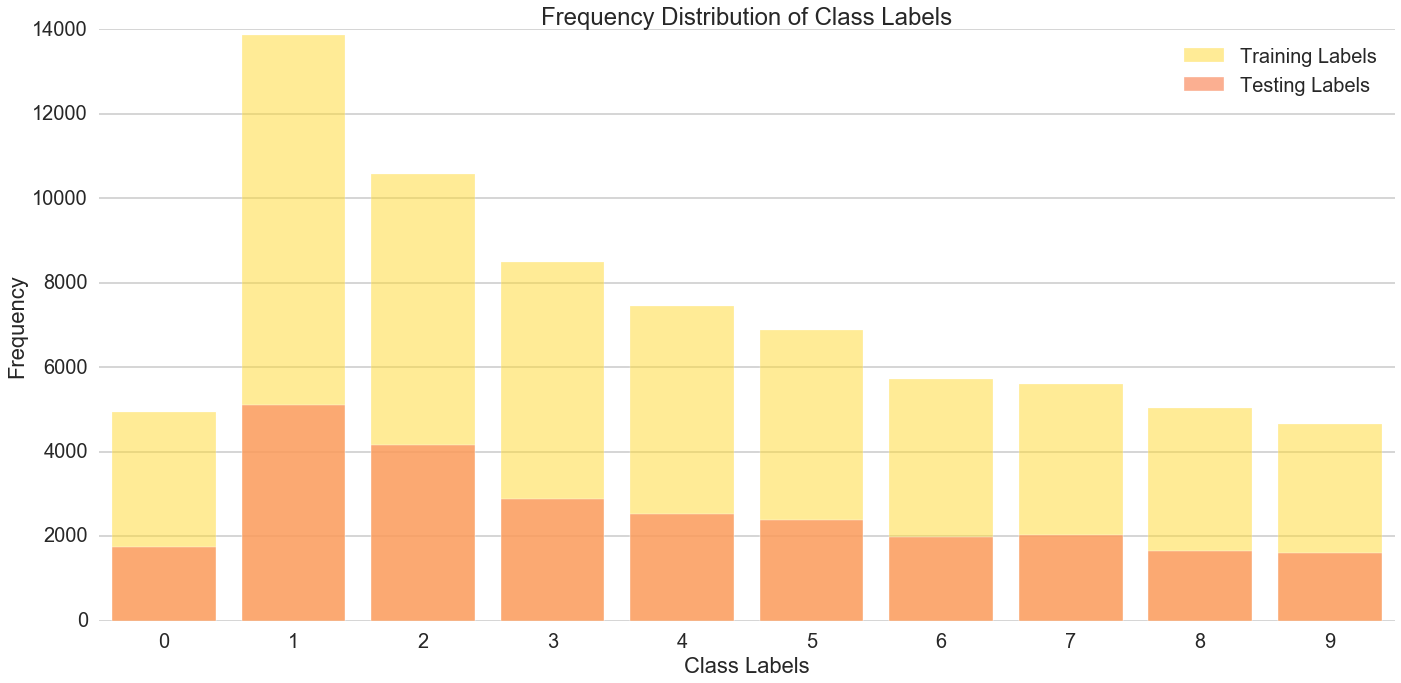

In [6]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
plt.bar(range(len(train_cnt_dict)), train_cnt_dict.values(), align='center', color=colors[5], 
                alpha=0.5, edgecolor='w', label='Training Labels')
plt.bar(range(len(test_cnt_dict)), test_cnt_dict.values(), align='center', color=colors[1], 
                alpha=0.7, edgecolor='w', label='Testing Labels')

# labels/titles
plt.legend(loc="best")
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Labels')

plt.xlim(-0.5,9.5)
ticks = [0,1,2,3,4,5,6,7,8,9]
plt.xticks(ticks, ticks)

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()